<a href="https://colab.research.google.com/github/ragusurya/Final_Project-House-price-predict-/blob/main/Final_Project(Raghupathi_N)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score

Read the data

In [2]:
df=pd.read_csv("train-chennai-sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

EDA 

In [7]:
df1=df.drop("PRT_ID",axis=1)

In [8]:
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [9]:
df1.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [10]:
df2=df1.dropna()

In [11]:
df2.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [12]:
df2.shape

(7056, 21)

In [13]:
df2

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


age of building

In [14]:
def get_year(x):
    txt = str(x)
    y = txt.split('-')
    if len(y) != 3:
        return 'None'
    return int(y[1])

In [ ]:
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'].astype(str),format='%d-%m-%Y')

In [ ]:
df2["DATE_BUILD"]=pd.to_datetime(df2["DATE_BUILD"].astype(str),format="%d-%m-%Y")

In [ ]:
df2["HOUSE_LIFETIME"]= df2["DATE_SALE"].subtract(df2["DATE_BUILD"])
df2

In [ ]:
df2["AGE_OF_BUILDING"]=df2["DATE_BUILD"].map(lambda x:get_year(x))

In [19]:
df2

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_LIFETIME,AGE_OF_BUILDING
0,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16060 days,5
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015 days,12
2,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,1992-02-09,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7300 days,2
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030 days,3
4,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10950 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-01-03,51,1.0,1.0,2,AdjLand,No,1962-01-15,...,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,17885 days,1
7105,Velachery,1897,2004-04-08,52,3.0,2.0,5,Family,Yes,1995-04-11,...,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,3285 days,4
7106,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-09-01,...,I,4.3,4.2,2.9,3.840,317354,167028,8351410,10220 days,9
7107,Karapakkam,787,2009-08-03,40,1.0,1.0,2,Partial,Yes,1977-08-11,...,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,11680 days,8


after calculating age of building, no use of date sale and date build coloumn so tat those two columns has to be dropped

In [20]:
df2.drop(["DATE_SALE","DATE_BUILD","HOUSE_LIFETIME"],axis=1)


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,5
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,12
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,3
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,1
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,4
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,9
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,8


In [21]:
df2.shape

(7056, 23)

checking the outlier and to remove it

In [22]:
df2.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_LIFETIME,AGE_OF_BUILDING
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07,8865 days 12:39:11.020408064,6.484410
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06,4503 days 21:45:48.800297408,3.527643
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,1460 days 00:00:00,1.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06,5110 days 00:00:00,3.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07,8395 days 00:00:00,7.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07,12410 days 00:00:00,10.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,20075 days 00:00:00,12.000000


checking the N_BEDROOM

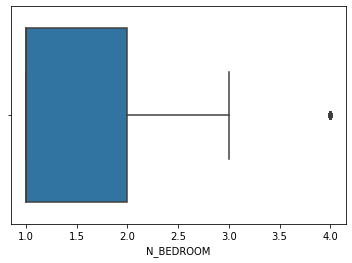

In [23]:
bed_rm=sns.boxplot(x=df2["N_BEDROOM"])

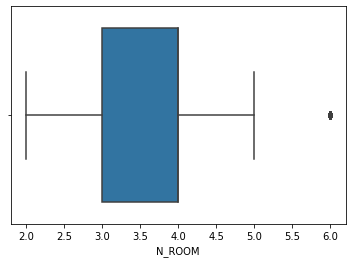

In [24]:
sns.boxplot(x=df2['N_ROOM'])

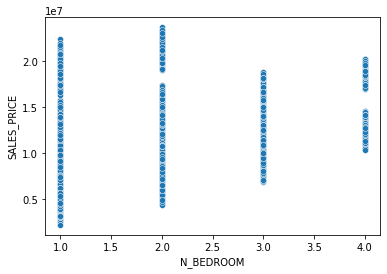

In [25]:
sns.scatterplot(data=df2,y="SALES_PRICE",x="N_BEDROOM")

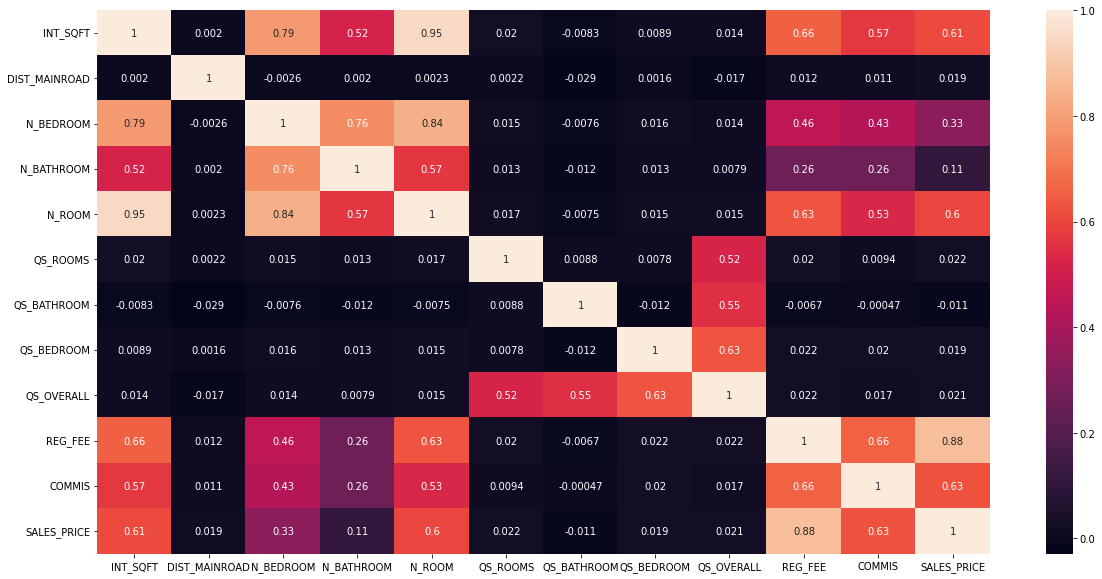

In [26]:
fig, ax = plt.subplots(figsize=(20,10)) 

dataplot = sns.heatmap(df.corr(),annot=True,ax=ax)

some outlier found in n_bedrooms remove the outlier

In [27]:
Q1 = np.percentile(df['N_BEDROOM'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['N_BEDROOM'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df2.shape)
 
# Upper bound
upper = np.where(df['N_BEDROOM']>= (Q3+3*IQR))
# Lower bound
lower = np.where(df['N_BEDROOM'] <= (Q1-3*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

Old Shape:  (7056, 23)
New Shape:  (7056, 23)


In [28]:
Q1 = np.percentile(df['N_ROOM'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['N_ROOM'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['N_ROOM']>= (Q3+3*IQR))
# Lower bound
lower = np.where(df['N_ROOM'] <= (Q1-3*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

Old Shape:  (7109, 22)
New Shape:  (7056, 23)


for my convenience split dataset into categorical and numerical

In [29]:
categorical_feat= ["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]
munerical_feat=["INT_SQFT ","N_BEDROOM","N_BATHROOM","N_ROOM","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","REG_FEE","COMMIS","SALES_PRICE"]


checking redundant of feature columns value

In [ ]:
data=df2[categorical_feat]
for col in data:
    print('Feature:',col,'--',data[col].unique(),'--count is--',len(data[col].unique()))

In [ ]:
df2["PARK_FACIL"]=df2["PARK_FACIL"].replace(["Noo"],"No")
df2["PARK_FACIL"]=df2["PARK_FACIL"].replace(["NO"],"No")

In [32]:
df2["PARK_FACIL"].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

In [ ]:
df2["BUILDTYPE"]=df2["BUILDTYPE"].replace(["Comercial"],"Commercial")
df2["BUILDTYPE"]=df2["BUILDTYPE"].replace(["Other"],"Others")

In [34]:
df2["BUILDTYPE"].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

In [35]:
df2["UTILITY_AVAIL"]=df2["UTILITY_AVAIL"].replace(["All Pub"],"AllPub")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2["UTILITY_AVAIL"].value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64

In [37]:
df2["AREA"]=df2["AREA"].replace(["Chrmpet","Chrompt","Chormpet"],"Chrompet")
df2["AREA"]=df2["AREA"].replace(["Ann Nagar","Ana Nagar"],"Anna Nagar")
df2["AREA"]=df2["AREA"].replace(["Karapakam"],"Karapakkam")
df2["AREA"]=df2["AREA"].replace(["Velchery"],"Velachery")
df2["AREA"]=df2["AREA"].replace(["TNagar"],"T Nagar")
df2["AREA"]=df2["AREA"].replace(["Adyr"],"Adyar")
df2["AREA"]=df2["AREA"].replace(["KKNagar"],"KK Nagar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [38]:
df2["AREA"].value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

In [ ]:
df2["SALE_COND"]=df2["SALE_COND"].replace(["Partiall","PartiaLl"],"Partial")
df2["SALE_COND"]=df2["SALE_COND"].replace(["Ab Normal"],"AbNormal")
df2["SALE_COND"]=df2["SALE_COND"].replace(["Adj Land"],"AdjLand")

In [40]:
df2["SALE_COND"].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

In [ ]:
df2["STREET"]=df2["STREET"].replace(["Pavd"],"Paved")
df2["STREET"]=df2["STREET"].replace(["NoAccess"],"No Access")

In [42]:
df2["STREET"].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

In [43]:
df3=df2.copy()

In [44]:
df3.drop(["DATE_SALE","DATE_BUILD","HOUSE_LIFETIME"],axis=1,inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_feat:
    df3[col] = le.fit_transform(df3[col])

In [46]:
df3.dtypes

AREA                 int64
INT_SQFT             int64
DIST_MAINROAD        int64
N_BEDROOM          float64
N_BATHROOM         float64
N_ROOM               int64
SALE_COND            int64
PARK_FACIL           int64
BUILDTYPE            int64
UTILITY_AVAIL        int64
STREET               int64
MZZONE               int64
QS_ROOMS           float64
QS_BATHROOM        float64
QS_BEDROOM         float64
QS_OVERALL         float64
REG_FEE              int64
COMMIS               int64
SALES_PRICE          int64
AGE_OF_BUILDING      int64
dtype: object

In [47]:
df3.shape

(7056, 20)

Splitting the dataset into train,test

In [48]:
scaler = StandardScaler()
X=df3.drop(["SALES_PRICE"], axis=1)
y=df3['SALES_PRICE']
cols = X.columns
X = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

training with model(Linear Regression)

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)   
r2_score(y_test,pred)

0.88412128087469

We are using r2_score here to measure the performance of our regression model.
Our model is giving a 0.88 r2_score out of 1 which is a very decent score.

Visualize our predictions

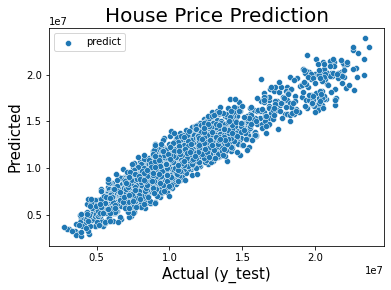

In [51]:
sns.scatterplot(x=y_test,y=pred)
plt.title("House Price Prediction",fontsize=20)
plt.xlabel("Actual (y_test)",fontsize=15)
plt.ylabel("Predicted",fontsize=15)
plt.legend(["predict"])
plt.show()

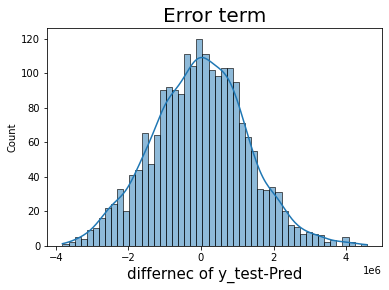

In [52]:
sns.histplot((y_test-pred),bins=50,kde=True)
plt.title("Error term",fontsize=20)
plt.xlabel("differnec of y_test-Pred",fontsize=15)
plt.show()

the difference between real value and our pred above histplot.so we can see that most of the residuals are around 0 means our predictions are almost near to the real values, hence it is a very good model.

lets check coefficient
which predicts the factors are going to play a important role on sales price

In [ ]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf


In [ ]:
y=df2["AREA"]
x=df2["SALES_PRICE"]
sns.scatterplot(x,y)
plt.title("House Price Prediction",fontsize=20)
plt.ylabel("AREA",fontsize=20)
plt.xlabel("SALES_PRICE",fontsize=20)
plt.legend(["AREA","SALES_PRICE"])
plt.show()